# Checkpoint 1: Data Cleaning 1

1. Load the companies and rounds data into two data frames and name them companies and rounds2 respectively

In [1]:
import numpy as np
import pandas as pd

companies = pd.read_csv('companies.csv', encoding= "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [2]:
round2 = pd.read_csv('rounds2.csv',encoding= "ISO-8859-1")
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


2. Table 1.1: The table below is just for reference — you need to fill out the spreadsheet which is attached in the download section. This holds true for all the tables.

Results Expected: Table 1.1

 Table 1.1: Understand the Data Set 

How many unique companies are present in rounds2?	
 

Q1. How many unique companies are present in companies?	                       
Q2. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	 
Q3. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	 
Q4. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name      the merged frame master_frame. How many observations are present in master_frame?

In [3]:
#How many unique companies are present in rounds2?
round2.shape, companies.shape

((114949, 6), (66368, 10))

In [4]:
round2['company_permalink'].describe()

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [5]:
round2.company_permalink=round2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii','ignore')
round2['company_permalink'] = round2['company_permalink'].str.lower()

In [6]:
round2['company_permalink'].describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

Q1 How many unique companies are present in rounds2?

Answer: 66368

In [7]:
# In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
companies = pd.read_csv('companies.csv', encoding= "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [8]:
companies.permalink=companies.permalink.str.encode('ISO-8859-1').str.decode('ascii','ignore')
companies['permalink']= companies['permalink'].str.lower()

In [9]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/citynews,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


Q2. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

Answer: permalink

In [10]:
# Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
set(companies['permalink'].unique())-set(round2['company_permalink'].unique())

set()

Q3. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
    
Answer: No

In [11]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 
#Name the merged frame master_frame. How many observations are present in master_frame?

master_frame= pd.merge(companies,round2,left_on='permalink',right_on='company_permalink',how='left')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
master_frame.shape

(114949, 16)

Q4. How many observations are present in master_frame?

Answer: 114949 Observations


-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

# Checkpoint 2: Funding Type Analysis 

Checkpoint 2: Funding Type Analysis
This is the first of the three goals of data analysis – investment type analysis.

 

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.
 

Spark Funds wants to choose one of these four investment types for each potential investment they will make.

 

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

 

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

 

In [13]:
#Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) 
# and report the answers in Table 2.1

In [14]:
master_frame['raised_amount_million_usd']= master_frame['raised_amount_usd']/1000000

In [15]:
master_frame['raised_amount_million_usd'].head()

0    10.000000
1          NaN
2     0.700000
3     3.406878
4     2.000000
Name: raised_amount_million_usd, dtype: float64

In [16]:
master_frame.isnull().sum()

permalink                        0
name                             1
homepage_url                  6134
category_list                 3410
status                           0
country_code                  8678
state_code                   10946
region                       10167
city                         10164
founded_at                   20521
company_permalink                0
funding_round_permalink          0
funding_round_type               0
funding_round_code           83809
funded_at                        0
raised_amount_usd            19990
raised_amount_million_usd    19990
dtype: int64

In [17]:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

permalink                     0.00
name                          0.00
homepage_url                  5.34
category_list                 2.97
status                        0.00
country_code                  7.55
state_code                    9.52
region                        8.84
city                          8.84
founded_at                   17.85
company_permalink             0.00
funding_round_permalink       0.00
funding_round_type            0.00
funding_round_code           72.91
funded_at                     0.00
raised_amount_usd            17.39
raised_amount_million_usd    17.39
dtype: float64

In [18]:
# Removing the Unecessary Columns
master_frame= master_frame.drop(['funding_round_code','funded_at','region','status','city','founded_at','homepage_url',
                                'state_code','permalink','funding_round_permalink','raised_amount_usd'], axis=1)

In [19]:
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd
0,#fame,Media,IND,/organization/-fame,venture,10.000000
1,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,venture,NaN
2,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,0.700000
3,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,/organization/-the-one-of-them-inc-,venture,3.406878
4,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2.000000


In [20]:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

name                          0.00
category_list                 2.97
country_code                  7.55
company_permalink             0.00
funding_round_type            0.00
raised_amount_million_usd    17.39
dtype: float64

In [21]:
#cleaning rows having null values
master_frame = master_frame[~(master_frame.raised_amount_million_usd.isnull()| master_frame.country_code.isnull() 
                              | master_frame.category_list.isnull())]

In [22]:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

name                         0.0
category_list                0.0
country_code                 0.0
company_permalink            0.0
funding_round_type           0.0
raised_amount_million_usd    0.0
dtype: float64

In [23]:
master_frame.shape,(len(master_frame.index)/114949)*100

((88529, 6), 77.01589400516751)

almost 23% Data were removed in cleaning Process

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
#Retaining the rows with only four investment types
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]

In [26]:
master_frame_FT=master_frame

In [27]:
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd
0,#fame,Media,IND,/organization/-fame,venture,10.000000
2,:Qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,0.700000
4,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2.000000
7,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,seed,0.043360
8,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,venture,0.719491


In [28]:
df_funding_round_type = master_frame.groupby('funding_round_type')
df_funding_round_type['raised_amount_million_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4400.0,0.971574,7.710904,0.0,0.152756,0.414906,1.000000,494.511992
private_equity,1820.0,73.938486,201.776467,0.0,5.000000,20.000000,75.762572,4745.460219
seed,21095.0,0.747794,2.288318,0.0,0.068817,0.300000,1.000000,200.000000
venture,47809.0,11.724223,88.215714,0.0,1.600000,5.000000,12.000000,17600.000000


The average Investment amount  for the Inverstment Type Venture is 11.72 million USD which is in the range of 5 to 15 million USD.

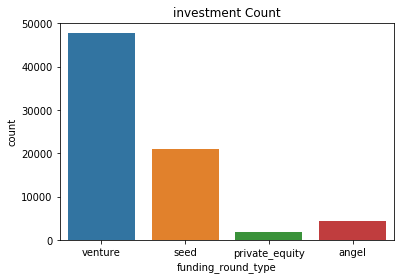

In [29]:
sns.countplot(x='funding_round_type',data=master_frame)
plt.title("investment Count")
plt.show()

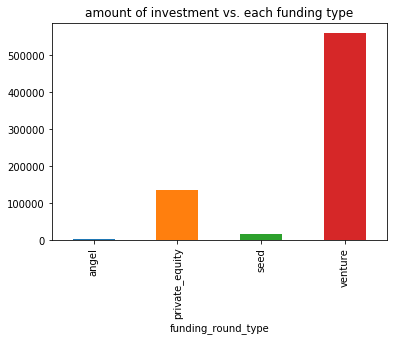

In [30]:
df_funding_round_type['raised_amount_million_usd'].sum().plot.bar()
plt.title("amount of investment vs. each funding type")
plt.show()

A plot showing the representative amount of investment in each funding type. T

Most of the companies/investor has choosen venture as it's count is Highest among all other Investment Type.

Hence, venture is the most suitable investment type as it falls under the criteria of Spark Fund Which is 5 to 15 million USD, in addition to it , Venture is liked by most of the Companies.

In [31]:
#As we are only intrested with Investment Type venture so we will keep records of this only.
master_frame = master_frame[master_frame['funding_round_type']=='venture']
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd
0,#fame,Media,IND,/organization/-fame,venture,10.000000
4,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2.000000
8,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,venture,0.719491
10,H2O.ai,Analytics,USA,/organization/0xdata,venture,20.000000
11,H2O.ai,Analytics,USA,/organization/0xdata,venture,1.700000


In [32]:
master_frame_country=master_frame

In [33]:
master_frame.shape

(47809, 6)

----------------------------------------------------------------------------------------

# Checkpoint 3: Country Analysis

This is the second goal of analysis — country analysis.

 

Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.

 

1. Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

 

2. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

 

Identify the top three English-speaking countries in the data frame top9.

 

Results Expected: All codes for data frame top9. Fill out Table 3.1.

 

Table 3.1: Analysing the Top 3 English-Speaking Countries

 1. Top English-speaking country            
 2. Second English-speaking country
 3. Third English-speaking country
 


In [34]:
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd
0,#fame,Media,IND,/organization/-fame,venture,10.000000
4,0-6.com,Curated Web,CHN,/organization/0-6-com,venture,2.000000
8,Ondine Biomedical Inc.,Biotechnology,CAN,/organization/0ndine-biomedical-inc,venture,0.719491
10,H2O.ai,Analytics,USA,/organization/0xdata,venture,20.000000
11,H2O.ai,Analytics,USA,/organization/0xdata,venture,1.700000


In [35]:
group_country = master_frame.groupby('country_code')

In [36]:
top9=group_country.sum().sort_values(by=['raised_amount_million_usd'], ascending=False).head(9)
top9

,raised_amount_million_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


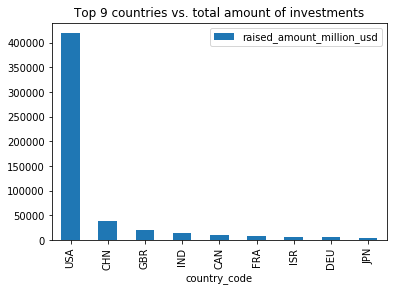

In [37]:
top9.plot(kind="bar")
plt.title("Top 9 countries vs. total amount of investments")
plt.show()

*Hence USA, UK and INDIA are top 3 English Speaking Countries with Majority of Investment Funding.*

In [38]:
# As we are interested in the Top three countries so we will remove Records of other Countries.
master_frame = master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd
0,#fame,Media,IND,/organization/-fame,venture,10.0
10,H2O.ai,Analytics,USA,/organization/0xdata,venture,20.0
11,H2O.ai,Analytics,USA,/organization/0xdata,venture,1.7
12,H2O.ai,Analytics,USA,/organization/0xdata,venture,8.9
22,1 Mainstream,Apps|Cable|Distribution|Software,USA,/organization/1-mainstream,venture,5.0


In [39]:
master_frame.shape

(38803, 6)

# Checkpoint 4: Sector Analysis 1


This is the third goal of analysis — sector analysis.

 

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

 

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

 

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

Extract the primary sector of each category list from the category_list column

Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

Expected Results: Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

In [40]:
import warnings
warnings.filterwarnings('ignore') 

primary_sector=master_frame["category_list"].str.split("|", n = 1, expand = True)
master_frame["primary_sector"]=primary_sector[0]
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd,primary_sector
0,#fame,Media,IND,/organization/-fame,venture,10.0,Media
10,H2O.ai,Analytics,USA,/organization/0xdata,venture,20.0,Analytics
11,H2O.ai,Analytics,USA,/organization/0xdata,venture,1.7,Analytics
12,H2O.ai,Analytics,USA,/organization/0xdata,venture,8.9,Analytics
22,1 Mainstream,Apps|Cable|Distribution|Software,USA,/organization/1-mainstream,venture,5.0,Apps


In [41]:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

name                         0.0
category_list                0.0
country_code                 0.0
company_permalink            0.0
funding_round_type           0.0
raised_amount_million_usd    0.0
primary_sector               0.0
dtype: float64

In [42]:
mapping = pd.read_csv("mapping.csv")
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [43]:
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [44]:
new=mapping["category_list"].str.split("|", n = 1, expand = True)
mapping.loc[:,"primary_sector"]=new.loc[:,0]
mapping=mapping.drop(['category_list'],axis=1)
mapping.head()

,main_sector,primary_sector
1,Manufacturing,3D
2,Manufacturing,3D Printing
3,Manufacturing,3D Technology
7,Manufacturing,Advanced Materials
15,Manufacturing,Agriculture


In [45]:
master_frame = pd.merge(master_frame,mapping ,on='primary_sector',how='left')
master_frame.head()

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd,primary_sector,main_sector
0,#fame,Media,IND,/organization/-fame,venture,10.0,Media,Entertainment
1,H2O.ai,Analytics,USA,/organization/0xdata,venture,20.0,Analytics,"Social, Finance, Analytics, Advertising"
2,H2O.ai,Analytics,USA,/organization/0xdata,venture,1.7,Analytics,"Social, Finance, Analytics, Advertising"
3,H2O.ai,Analytics,USA,/organization/0xdata,venture,8.9,Analytics,"Social, Finance, Analytics, Advertising"
4,1 Mainstream,Apps|Cable|Distribution|Software,USA,/organization/1-mainstream,venture,5.0,Apps,"News, Search and Messaging"


In [46]:
len(master_frame[master_frame.main_sector.isnull()])

161

In [47]:
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

38642

In [48]:
master_frame.shape

(38642, 8)

# Checkpoint 5: Sector Analysis 2

---------------------------------------------------------------------------

Checkpoint 5: Sector Analysis 2
Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, we refer to one of the eight main sectors.

 

Also, you know the top three English speaking countries and the most suitable funding type for Spark Funds. Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.

 

Also, the range of funding preferred by Spark Funds is 5 to 15 million USD.

 

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

 

Result Expected 

Three data frames D1, D2 and D3 

Table 5.1: Based on the analysis of the sectors, which main sectors and countries would you recommend Spark Funds to invest in? Present your conclusions in the presentation. The conclusions are subjective (i.e. there may be no ‘one right answer’), but it should be based on the basic strategy — invest in sectors where most investments are occurring. 

In [49]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 38802
Data columns (total 8 columns):
name                         38642 non-null object
category_list                38642 non-null object
country_code                 38642 non-null object
company_permalink            38642 non-null object
funding_round_type           38642 non-null object
raised_amount_million_usd    38642 non-null float64
primary_sector               38642 non-null object
main_sector                  38642 non-null object
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [50]:
D1= master_frame[(master_frame.country_code=='USA')&(master_frame.raised_amount_million_usd >=5)&(master_frame.raised_amount_million_usd <= 15)]
D1

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd,primary_sector,main_sector
3,H2O.ai,Analytics,USA,/organization/0xdata,venture,8.900000,Analytics,"Social, Finance, Analytics, Advertising"
4,1 Mainstream,Apps|Cable|Distribution|Software,USA,/organization/1-mainstream,venture,5.000000,Apps,"News, Search and Messaging"
17,128 Technology,Service Providers|Technology,USA,/organization/128-technology,venture,11.999347,Service Providers,Others
20,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,15.000000,Manufacturing,Manufacturing
21,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,5.000000,Manufacturing,Manufacturing
22,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,5.150000,Manufacturing,Manufacturing
23,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,12.400000,Manufacturing,Manufacturing
24,1366 Technologies,Manufacturing,USA,/organization/1366-technologies,venture,6.000000,Manufacturing,Manufacturing
29,170 Systems,Software,USA,/organization/170-systems,venture,14.000000,Software,Others
31,17zuoye,Education|Language Learning,USA,/organization/17zuoye,venture,5.000000,Education,Others


In [51]:
D1.describe()

,raised_amount_million_usd
count,12012.000000
mean,8.934257
std,3.075071
min,5.000000
25%,6.012337
50%,8.304890
75%,11.000000
max,15.000000


In [52]:
D1.describe().iloc[0,0]

12012.0

In [53]:
D1.sort_values(by=['raised_amount_million_usd'],ascending=False)

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd,primary_sector,main_sector
11379,Entellus Medical,Health Care,USA,/organization/entellus-medical,venture,15.0,Health Care,Health
26953,Proterra,Public Transportation,USA,/organization/proterra,venture,15.0,Public Transportation,Health
26632,Primcogent Solutions,Health Care,USA,/organization/primcogent-solutions,venture,15.0,Health Care,Health
32445,Stoke,Mobile,USA,/organization/stoke,venture,15.0,Mobile,"News, Search and Messaging"
2641,Apreso Classroom,All Students|EdTech|Education,USA,/organization/apreso-classroom,venture,15.0,All Students,Others
26680,Prism Pharmaceuticals,Biotechnology|Medical|Pharmaceuticals,USA,/organization/prism-pharmaceuticals,venture,15.0,Biotechnology,Cleantech / Semiconductors
26681,Prism Skylabs,Analytics|Business Intelligence|Enterprises|En...,USA,/organization/prism-skylabs,venture,15.0,Analytics,"Social, Finance, Analytics, Advertising"
26735,ProactiveNet,Business Services|Information Technology|Software,USA,/organization/proactivenet,venture,15.0,Business Services,"Social, Finance, Analytics, Advertising"
26754,"Procore Technologies, Inc.",Construction|Software,USA,/organization/procore-technologies,venture,15.0,Construction,Manufacturing
10921,Electric Imp,Home Automation|Internet of Things,USA,/organization/electric-imp,venture,15.0,Home Automation,Cleantech / Semiconductors


In [54]:
D1.name

3                               H2O.ai
4                         1 Mainstream
17                      128 Technology
20                   1366 Technologies
21                   1366 Technologies
22                   1366 Technologies
23                   1366 Technologies
24                   1366 Technologies
29                         170 Systems
31                             17zuoye
32                             17zuoye
36       One Block Off the Grid (1BOG)
41                             1stdibs
49                          2080 Media
52                          2080 Media
57                              21 Inc
58                  22nd Century Group
63                             23andMe
64                             23andMe
66                             23andMe
71                              28msec
76                           2nd Watch
81                             2U Inc.
83                             2U Inc.
91                     3-V Biosciences
93                     3-

In [55]:
D2= master_frame[(master_frame.country_code=='GBR')&(master_frame.raised_amount_million_usd >=5)&(master_frame.raised_amount_million_usd <= 15)]
D2

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd,primary_sector,main_sector
108,365Scores,Android|Apps|iPhone|Mobile|Sports,GBR,/organization/365scores,venture,5.500000,Android,"Social, Finance, Analytics, Advertising"
232,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,/organization/7digital,venture,8.468328,Content Creators,Entertainment
233,7digital,Content Creators|Content Delivery|Licensing|Mu...,GBR,/organization/7digital,venture,10.000000,Content Creators,Entertainment
256,90min,Media|News|Publishing|Soccer|Sports,GBR,/organization/90min,venture,15.000000,Media,Entertainment
257,90min,Media|News|Publishing|Soccer|Sports,GBR,/organization/90min,venture,5.800000,Media,Entertainment
305,Abcodia,Biotechnology,GBR,/organization/abcodia,venture,8.259067,Biotechnology,Cleantech / Semiconductors
381,Acacia Pharma,Biotechnology,GBR,/organization/acacia-pharma,venture,10.000000,Biotechnology,Cleantech / Semiconductors
393,ACAL Energy,Clean Technology,GBR,/organization/acal-energy,venture,9.910333,Clean Technology,Cleantech / Semiconductors
396,Acal Enterprise Solutions,Information Technology,GBR,/organization/acal-enterprise-solutions,venture,10.720178,Information Technology,"Social, Finance, Analytics, Advertising"
427,Accent Media Limited,Domains|Internet|Ticketing,GBR,/organization/accent-media-ltd,venture,8.300000,Domains,"News, Search and Messaging"


In [56]:
D2.describe()

,raised_amount_million_usd
count,619.000000
mean,8.667574
std,2.870091
min,5.000000
25%,6.082165
50%,8.000000
75%,10.653380
max,15.000000


In [57]:
D1['raised_amount_million_usd'].sum()

107318.29466400002

In [58]:
D2.sort_values(by=['raised_amount_million_usd'],ascending=False)

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd,primary_sector,main_sector
29943,SenSage,Security,GBR,/organization/sensage,venture,15.000000,Security,Others
30633,SilverRail Technologies,Technology|Transportation|Travel,GBR,/organization/silverrail-technologies,venture,15.000000,Technology,Others
2124,Anadigm,Semiconductors|Technology,GBR,/organization/anadigm,venture,15.000000,Semiconductors,Cleantech / Semiconductors
18014,Kano Computing,Hardware + Software,GBR,/organization/kano-computing,venture,15.000000,Hardware + Software,Manufacturing
21920,MUBI,Entertainment|Film|Social Media|Social Network...,GBR,/organization/mubi,venture,15.000000,Entertainment,Entertainment
14374,GreenRoad Technologies,Cars|Clean Technology|Diving|Green|Internet|So...,GBR,/organization/greenroad-technologies,venture,15.000000,Cars,Automotive & Sports
17918,Kaazing,Apps|Data Integration|Enterprise Software|Info...,GBR,/organization/kaazing,venture,15.000000,Apps,"News, Search and Messaging"
11445,EnvironmentIQ,Software,GBR,/organization/environmentiq,venture,15.000000,Software,Others
19026,Light Blue Optics,Automotive|Consumer Electronics|Hardware + Sof...,GBR,/organization/light-blue-optics,venture,15.000000,Automotive,Automotive & Sports
23332,Notonthehighstreet,E-Commerce,GBR,/organization/notonthehighstreet,venture,15.000000,E-Commerce,Others


In [59]:
D3=master_frame[(master_frame.country_code=='IND')&(master_frame.raised_amount_million_usd >=5)&(master_frame.raised_amount_million_usd <= 15)]
D3

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd,primary_sector,main_sector
0,#fame,Media,IND,/organization/-fame,venture,10.000000,Media,Entertainment
55,21Diamonds,E-Commerce,IND,/organization/21diamonds-india,venture,6.369507,E-Commerce,Others
276,A LITTLE WORLD,Finance,IND,/organization/a-little-world,venture,6.410000,Finance,"Social, Finance, Analytics, Advertising"
926,Adlabs Imagica,Entertainment|Tourism,IND,/organization/adlabs-imagica,venture,8.180000,Entertainment,Entertainment
1262,Agile,Finance|Finance Technology|FinTech|Insurance,IND,/organization/agile,venture,5.740000,Finance,"Social, Finance, Analytics, Advertising"
1522,Akosha,Consumer Internet|Digital Media|Enterprise Sof...,IND,/organization/akosha,venture,5.000000,Consumer Internet,"Social, Finance, Analytics, Advertising"
1915,Amagi Media Labs,Advertising,IND,/organization/amagi-media-labs,venture,5.500000,Advertising,"Social, Finance, Analytics, Advertising"
2019,Ameyo,Software,IND,/organization/ameyo,venture,5.000000,Software,Others
2210,Ola,Automotive|E-Commerce|Internet|Mobile|Mobile C...,IND,/organization/ani-technologies,venture,5.000000,Automotive,Automotive & Sports
2230,Annapurna Microfinace,Finance,IND,/organization/annapurna-microfinace,venture,5.000000,Finance,"Social, Finance, Analytics, Advertising"


In [60]:
D3.describe()

,raised_amount_million_usd
count,328.000000
mean,8.992511
std,3.219811
min,5.000000
25%,6.000000
50%,8.700000
75%,10.555000
max,15.000000


In [61]:
D3.sort_values(by=['raised_amount_million_usd'],ascending=False)

,name,category_list,country_code,company_permalink,funding_round_type,raised_amount_million_usd,primary_sector,main_sector
28939,Roposo,E-Commerce|Fashion,IND,/organization/roposo,venture,15.0,E-Commerce,Others
25361,Pepperfry.com,E-Commerce,IND,/organization/pepperfry-com,venture,15.0,E-Commerce,Others
34708,TravelGuru,Career Planning|Curated Web|Transportation|Travel,IND,/organization/travelguru,venture,15.0,Career Planning,"Social, Finance, Analytics, Advertising"
3807,Azure Power,Clean Technology|Energy|Renewable Energies,IND,/organization/azure-power,venture,15.0,Clean Technology,Cleantech / Semiconductors
17903,K-12 Techno Services,EdTech|Education,IND,/organization/k-12-techno-services,venture,15.0,EdTech,Others
16115,Incredible Technologies (CredR),Automotive,IND,/organization/incredible-technologies-pvt-ltd,venture,15.0,Automotive,Automotive & Sports
8016,CommonFloor,Real Estate,IND,/organization/commonfloor,venture,15.0,Real Estate,Others
33520,Tejas Networks India,Web Hosting,IND,/organization/tejas-networks-india,venture,15.0,Web Hosting,Others
7972,Comat Technologies,Governments|Health and Insurance,IND,/organization/comat-technologies,venture,15.0,Governments,Others
7331,Classteacher Learning Systems,EdTech|Education,IND,/organization/classteacher-learning-systems,venture,15.0,EdTech,Others


In [62]:
D3['main_sector'].value_counts()

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [63]:
D3['main_sector'].value_counts()[0:1]

Others    110
Name: main_sector, dtype: int64

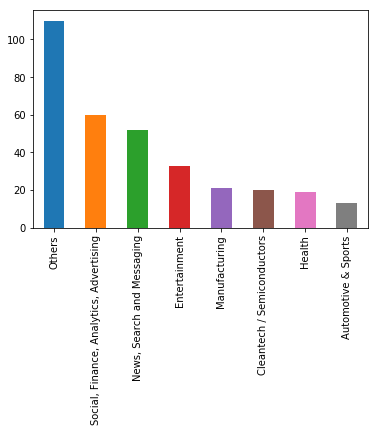

In [64]:
D3['main_sector'].value_counts().plot.bar()
plt.show()

In [65]:
D3_IND=D3.groupby('main_sector')
D3_IND['raised_amount_million_usd'].describe().sort_values(by=['count'],ascending=False)


,count,mean,std,min,25%,50%,75%,max
main_sector,,,,,,,,
Others,110.0,9.212814,3.442976,5.0,6.0000,9.000000,12.00,15.00
"Social, Finance, Analytics, Advertising",60.0,9.175826,3.412513,5.0,6.0000,8.178025,11.25,15.00
"News, Search and Messaging",52.0,8.342972,2.698080,5.0,5.9250,8.000000,10.00,15.00
Entertainment,33.0,8.510000,3.102527,5.0,6.0000,8.000000,10.00,15.00
Manufacturing,21.0,9.566667,2.982798,5.0,8.0000,10.000000,10.00,15.00
Cleantech / Semiconductors,20.0,8.269000,3.173212,5.0,5.3975,8.000000,9.85,15.00
Health,19.0,8.828421,2.200690,5.0,7.5000,9.000000,10.00,13.08
Automotive & Sports,13.0,10.530769,3.974373,5.0,6.5000,11.000000,15.00,15.00


*Top three sectors are **Others, (social, Finance, Analytics, Advertising)	and (News, Search and Messaging)** based on Number of Investments in INDIA(IND)*

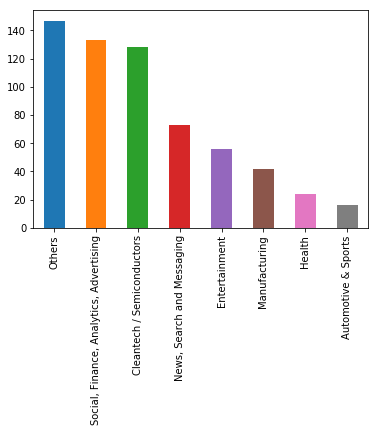

In [66]:
D2['main_sector'].value_counts().plot.bar()
plt.show()

In [67]:
D2_GBR=D2.groupby('main_sector')
D2_GBR['raised_amount_million_usd'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
main_sector,,,,,,,,
Others,147.0,8.732138,2.966282,5.000000,6.220000,8.000000,10.430688,15.0
"Social, Finance, Analytics, Advertising",133.0,8.191008,2.741593,5.000000,5.918360,7.719600,10.000000,15.0
Cleantech / Semiconductors,128.0,8.985466,2.938918,5.000000,6.159318,8.460000,11.560439,15.0
"News, Search and Messaging",73.0,8.434880,2.659225,5.000000,6.080000,7.520000,10.000000,15.0
Entertainment,56.0,8.621155,2.692381,5.000000,5.950000,8.502954,10.287973,15.0
Manufacturing,42.0,8.617627,2.762393,5.000000,6.500000,7.965208,10.000000,15.0
Health,24.0,8.939063,3.133502,5.000000,6.299424,7.846073,11.512082,14.3
Automotive & Sports,16.0,10.440723,3.371176,5.133089,7.489753,10.945000,13.000000,15.0


*Top three sectors are **Others, (social, Finance, Analytics, Advertising)	and Cleantech / Semiconductors** Based on Number of Investments in United Kingdom(GBR)*

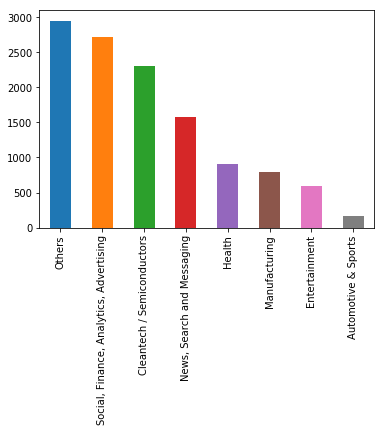

In [68]:
D1['main_sector'].value_counts().plot.bar()
plt.show()

In [69]:
D1_USA=D1.groupby('main_sector')
D1_USA['raised_amount_million_usd'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
main_sector,,,,,,,,
Others,2950.0,8.922375,3.063264,5.0,6.000000,8.250000,11.000000,15.0
"Social, Finance, Analytics, Advertising",2714.0,8.772062,3.068090,5.0,6.000000,8.000000,10.685172,15.0
Cleantech / Semiconductors,2300.0,9.220273,3.110482,5.0,6.500000,9.000000,11.990022,15.0
"News, Search and Messaging",1582.0,8.824000,3.066099,5.0,6.000000,8.000000,10.800000,15.0
Health,909.0,9.033949,3.089421,5.0,6.100007,8.600000,11.200000,15.0
Manufacturing,799.0,9.084547,3.010014,5.0,6.490000,8.800000,11.112496,15.0
Entertainment,591.0,8.628085,3.058181,5.0,6.000000,8.000000,10.450000,15.0
Automotive & Sports,167.0,8.707212,2.981831,5.0,6.000000,8.181488,10.950000,15.0


*Top three sectors are **Others, (social, Finance, Analytics, Advertising)	and Cleantech / Semiconductors** Based on Number of Investments in USA*

In [70]:
print("Total Number of investment done by USA =",D1.describe().iloc[0,0])
print("Total Number of investment done by GBR =",D2.describe().iloc[0,0])
print("Total Number of investment done by IND =",D3.describe().iloc[0,0])

Total Number of investment done by USA = 12012.0
Total Number of investment done by GBR = 619.0
Total Number of investment done by IND = 328.0


In [71]:
print("Total amount of investment done by USA in million USD =",round(D1['raised_amount_million_usd'].sum(),2))
print("Total amount of investment done by GBR in million USD=",round(D2['raised_amount_million_usd'].sum(),2))
print("Total amount of investment done by IND in million USD =",round(D3['raised_amount_million_usd'].sum(),2))

Total amount of investment done by USA in million USD = 107318.29
Total amount of investment done by GBR in million USD= 5365.23
Total amount of investment done by IND in million USD = 2949.54


In [72]:
D1_USA_TopSectorCompany=D1[D1['main_sector']=='Others']

D1_USA_Company=D1_USA_TopSectorCompany.groupby(('name','main_sector'))

D1_USA_Company['raised_amount_million_usd'].sum().sort_values(ascending=False).head()

name                 main_sector
Virtustream          Others         64.300000
Capella Photonics    Others         54.968051
AirTight Networks    Others         54.201907
deCarta              Others         52.100000
Black Duck Software  Others         51.000000
Name: raised_amount_million_usd, dtype: float64

*In USA, Virtustream is the Company with Highest Investment in the Main sector 'Others'.*

In [73]:
D1_USA_2ndTopSectorCompany=D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']

D1_USA_2ndCompany=D1_USA_2ndTopSectorCompany.groupby(('name','main_sector'))

D1_USA_2ndCompany['raised_amount_million_usd'].sum().sort_values(ascending=False).head()

name                             main_sector                            
SST Inc. (Formerly ShotSpotter)  Social, Finance, Analytics, Advertising    67.933006
Demandbase                       Social, Finance, Analytics, Advertising    63.000000
Intacct                          Social, Finance, Analytics, Advertising    61.800000
NetBase Solutions                Social, Finance, Analytics, Advertising    60.600000
Lotame                           Social, Finance, Analytics, Advertising    59.700000
Name: raised_amount_million_usd, dtype: float64

*In USA, SST Inc.(Formerly ShotSpotter) is  Company with Highest Investment in the Sector Social, Finance, Analytics, Advertising .*

In [74]:
D2_GBR_TopSectorCompany=D2[D2['main_sector']=='Others']

D2_GBR_Company=D2_GBR_TopSectorCompany.groupby(('name','main_sector'))

D2_GBR_Company['raised_amount_million_usd'].sum().sort_values(ascending=False).head()

name                     main_sector
Electric Cloud           Others         37.000000
SenSage                  Others         36.250000
Enigmatec                Others         32.500000
SilverRail Technologies  Others         29.000000
OpenCloud                Others         27.972766
Name: raised_amount_million_usd, dtype: float64

*In United Kindom(GBR), Electric Cloud is the company who received highest investment the sector categorized Others.*

In [75]:
D2_GBR_2ndTopSectorCompany=D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']

D2_GBR_2ndCompany=D2_GBR_2ndTopSectorCompany.groupby(('name','main_sector'))

D2_GBR_2ndCompany['raised_amount_million_usd'].sum().sort_values(ascending=False).head()

name                   main_sector                            
Celltick Technologies  Social, Finance, Analytics, Advertising    37.500000
myThings               Social, Finance, Analytics, Advertising    34.000000
Zopa                   Social, Finance, Analytics, Advertising    32.900000
VisualDNA              Social, Finance, Analytics, Advertising    28.550000
MarketInvoice          Social, Finance, Analytics, Advertising    25.553007
Name: raised_amount_million_usd, dtype: float64

*In United Kindom(GBR), Celltick Technologies is the company who received highest investment the sector categorized as Social, Finance, Analytics, Advertising.*

In [76]:


D3_IND_TopSectorCompany=D3[D3['main_sector']=='Others']

D3_IND_Company=D3_IND_TopSectorCompany.groupby(('name','main_sector'))

D3_IND_Company['raised_amount_million_usd'].sum().sort_values(ascending=False).head()

name               main_sector
FirstCry.com       Others         39.0
Myntra             Others         38.0
CommonFloor        Others         32.9
Pepperfry.com      Others         28.0
ItzCash Card Ltd.  Others         25.0
Name: raised_amount_million_usd, dtype: float64

*In India, FirstCry.com is the Company who received highest Investment in the sector categorized as Others.*

In [77]:
D3_IND_2ndTopSectorCompany=D3[D3['main_sector']=='News, Search and Messaging']

D3_IND_2ndCompany=D3_IND_2ndTopSectorCompany.groupby(('name','main_sector'))

D3_IND_2ndCompany['raised_amount_million_usd'].sum().sort_values(ascending=False).head()

name         main_sector               
GupShup      News, Search and Messaging    33.0
IMImobile    News, Search and Messaging    23.0
SMS GupShup  News, Search and Messaging    22.0
hike         News, Search and Messaging    21.0
Roadrunnr    News, Search and Messaging    21.0
Name: raised_amount_million_usd, dtype: float64

*In India, GupShup is the Company who received highest Investment in the sector categorized as News, Search and Messaging.*

# Checkpoint 6: Plots

As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:

 

1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                                                                                                                                                             

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

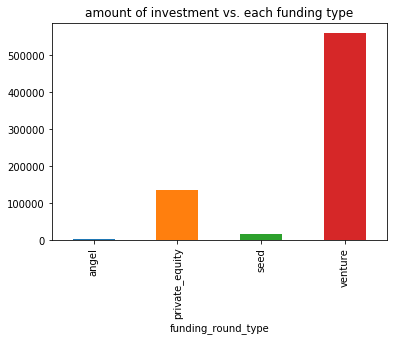

In [78]:
df_funding_round_type = master_frame_FT.groupby('funding_round_type')
df_funding_round_type['raised_amount_million_usd'].sum().plot.bar()
plt.title("amount of investment vs. each funding type")
plt.show()


From above plot it is clear that best Funding Type is **venture** for the Spark Fund.

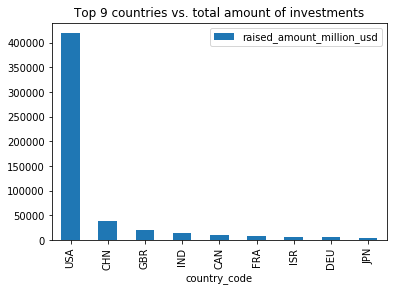

In [79]:
master_frame_country = master_frame_country.groupby('country_code')
TopNineCountry= master_frame_country.sum().sort_values(by=['raised_amount_million_usd'], ascending=False).head(9)
TopNineCountry.plot(kind="bar")
plt.title("Top 9 countries vs. total amount of investments")
plt.show()


From above plot it clear that the top 3 English speaking countries where Spark would like to Invest are USA, United Kingdom(GBR)
and India.

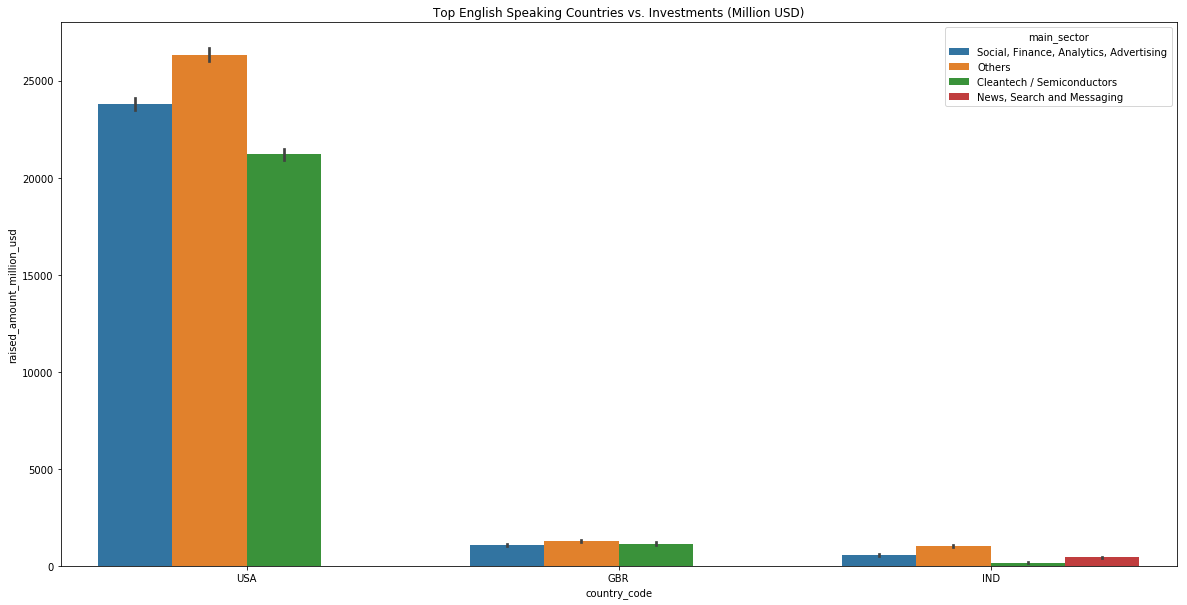

In [83]:
master_frame = master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]
D1=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D2=D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D3=D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors','News, Search and Messaging'])]
frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
plt.title("Top English Speaking Countries vs. Investments (Million USD)")
sns.barplot(x='country_code', y='raised_amount_million_usd', hue="main_sector", data=result, estimator=np.sum)
plt.show()

--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------